In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
data_route = '/content/vgames2.csv'
df = pd.read_csv(data_route, index_col=0) 
df.shape #데이터 확인

(16598, 9)

In [4]:
df.isna().sum()
df.dropna(axis=0, inplace=True)
df.isna().sum()
df.shape # 결측치 제거 확인

(16241, 9)

In [5]:
# 장르 전체 현황파악
df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Game Genre')

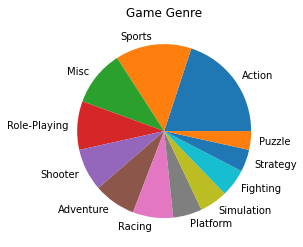

In [6]:
# 장르 전체 현황파악
import matplotlib.pyplot as plt
df['Genre'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Game Genre')

In [7]:
sorted(df['Year'].unique()) # 2자리 이하의 연도 확인 0~16, 86~98
condition1 = (df['Year'] >= 80) & (df['Year'] <= 99)
condition2 = (df['Year'] >= 0) & (df['Year'] <= 30)

need_to_change1 = condition1[condition1].index
need_to_change2 = condition2[condition2].index

for index in need_to_change1:
  df.loc[index, 'Year'] =  df.loc[index, 'Year'] + 1900
for index in need_to_change2:
  df.loc[index, 'Year'] =  df.loc[index, 'Year'] + 2000

df['Year'].sort_values(ascending=True) # 변환 확인

14265    1980.0
5724     1980.0
15013    1980.0
9227     1980.0
13134    1980.0
          ...  
7130     2016.0
10108    2017.0
5311     2017.0
15234    2017.0
6907     2020.0
Name: Year, Length: 16241, dtype: float64

In [22]:
# 판매단위 K : 1,000, M = 1,000,000
# 판매량에 M 붙은 값 처리
columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in columns:
  condition = (df[col].str.contains('M'))
  need_to_change = condition[condition].index
  for index in need_to_change:
    df.loc[index, col] = df.loc[index, col].replace('M','')

In [53]:
# K 붙은 값의 index 확인 > 나중에 필요
to_M = []
for col in columns:
  condition = df[col].str.contains('K') 
  need_to_change = condition[condition].index
  to_M.append(need_to_change)

In [54]:
to_M[1:3] # 잘 담겼는지 확인

[Int64Index([  129,   139,   503,   973,   997,  1095,  1264,  1376,  1474,
              1556,  1630,  1872,  2014,  2185,  2201,  2484,  2660,  2731,
              2907,  3346,  3546,  3846,  4050,  4082,  4128,  4600,  4710,
              4750,  4825,  5025,  5321,  5500,  5532,  5711,  5747,  6113,
              6429,  6535,  6900,  6907,  7185,  7320,  7506,  7555,  7688,
              7787,  7837,  7917,  7954,  7994,  8011,  8069,  8393,  8422,
              8917,  9120,  9210,  9400,  9498,  9661,  9746,  9755,  9831,
              9929, 10461, 10668, 10844, 10903, 11172, 11711, 11902, 11939,
             12420, 12519, 12750, 13051, 13067, 13245, 13531, 13746, 13831,
             14027, 14282, 14319, 14394, 14416, 14445, 15001, 15157, 15373,
             15532, 15758, 15844, 16119, 16129, 16158, 16375, 16526],
            dtype='int64'),
 Int64Index([   11,    90,    91,   828,   845,  1484,  1601,  1905,  2319,
              2401,  2607,  2773,  2856,  3167,  3213,  3235,  344

In [55]:
# 판매량에 K 붙은 값 처리
for col in columns:
  condition = (df[col].str.contains('K'))
  need_to_change = condition[condition].index
  for index in need_to_change:
    df.loc[index, col] = df.loc[index, col].replace('K','')

In [56]:
# dtype 변형
df = df.astype({'NA_Sales' : 'float', 'EU_Sales' : 'float', 'JP_Sales' : 'float', 'Other_Sales' : 'float'})

In [57]:
# test : K처리된 값들 M과 단위 통일
for index in to_M[0]: 
  df.loc[index, 'NA_Sales'] = df.loc[index, 'NA_Sales'] * 0.001
for index in to_M[1]:  
  df.loc[index, 'EU_Sales'] = df.loc[index, 'EU_Sales'] * 0.001
for index in to_M[2]: 
  df.loc[index, 'JP_Sales'] = df.loc[index, 'JP_Sales'] * 0.001
for index in to_M[3]: 
  df.loc[index, 'Other_Sales'] = df.loc[index, 'Other_Sales'] * 0.001

In [58]:
# 단위 맞추기 적용 잘 됐는지 확인
sorted(df['EU_Sales'].unique()[-50:])

[0.93,
 0.96,
 1.21,
 1.44,
 1.54,
 1.62,
 1.64,
 1.65,
 1.69,
 1.74,
 1.8,
 1.84,
 1.9,
 1.93,
 1.98,
 1.99,
 2.11,
 2.22,
 2.23,
 2.25,
 2.36,
 2.39,
 2.4,
 2.42,
 2.47,
 2.51,
 2.61,
 2.64,
 2.86,
 2.99,
 3.03,
 3.1,
 3.11,
 3.14,
 3.28,
 3.4,
 3.44,
 3.48,
 3.75,
 3.76,
 3.91,
 4.52,
 5.31,
 5.82,
 7.06,
 7.57,
 8.59,
 9.26,
 11.0,
 12.88]

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# 장르&국가별 시장조사
genre_country = df[['Genre', 'NA_Sales','EU_Sales',	'JP_Sales',	'Other_Sales']]
genre_country.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04


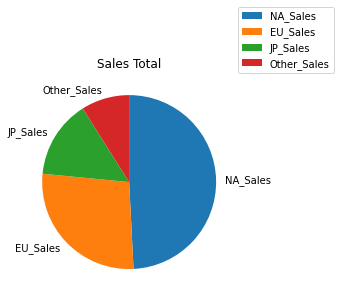

In [61]:
# 가장 큰 시장 확인
# 게임장르를 제쳐두고 우선 모든 장르 대상으로 가장 출고량 많은 시장확인
# 이상점 염두해 두고 일단 참고지표로 활용.
# 1. 북미 2. 유럽 3. 일본 4. 기타
sales_total = genre_country.loc[:, 'NA_Sales':].sum()

total = pd.DataFrame(sales_total)
total.columns = ['total']
total.plot(kind='pie', y='total', startangle=90, counterclock=False)

plt.legend(loc=(1,1))
plt.title('Sales Total')
plt.ylabel('')
plt.show()

In [123]:
from matplotlib import rcParams
check1 = genre_country.groupby('Genre').sum().sort_values(by='EU_Sales')
# 정렬기준 column을 바꾸면서 그래프를 출력
check1.reset_index(inplace=True)
check1
# 장르별로 각 지역의 총 판매량 확인(장르별 선호도 확인)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Strategy,67.83,44.82,49.10,11.23
1,Puzzle,121.58,50.47,56.24,12.44
2,Adventure,101.79,63.66,51.87,16.70
3,Fighting,220.35,99.90,87.14,36.15
4,Simulation,181.43,112.99,63.54,31.32
5,Role-Playing,318.76,183.09,342.93,56.73
6,Platform,445.38,200.63,130.53,51.45
7,Misc,394.73,208.15,104.18,72.64
8,Racing,354.70,235.02,56.32,76.51
9,Shooter,574.48,310.23,38.18,101.86


In [124]:
check1.corr()
# 지역별 상관관계 확인 북미, 유럽, 기타지역의 강한 양의 상관관계 발견 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986484,0.285377,0.974401
EU_Sales,0.986484,1.000000,0.278428,0.994272
JP_Sales,0.285377,0.278428,1.000000,0.263562
Other_Sales,0.974401,0.994272,0.263562,1.000000


Text(0.5, 1.0, 'North America')

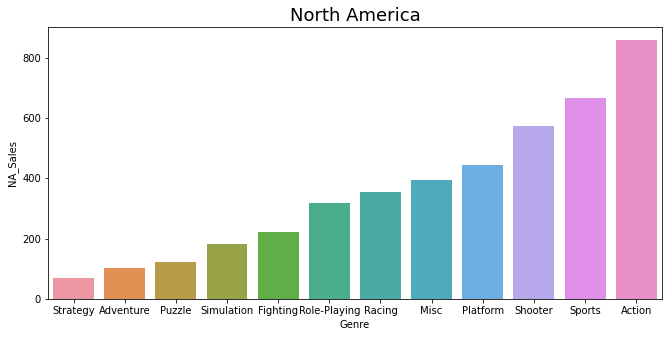

In [64]:
# 북미지역
rcParams['figure.figsize'] = 11,5
sns.barplot(x='Genre', y='NA_Sales', data=check1)
plt.title('North America', fontsize=18)

Text(0.5, 1.0, 'Europe')

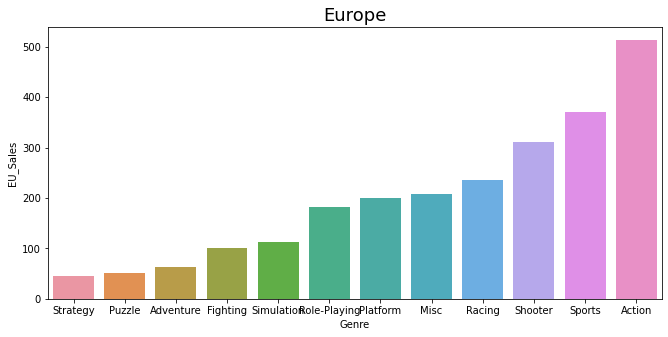

In [67]:
# 유럽지역
sns.barplot(x='Genre', y='EU_Sales', data=check1)
plt.title('Europe', fontsize=18)

Text(0.5, 1.0, 'Japan')

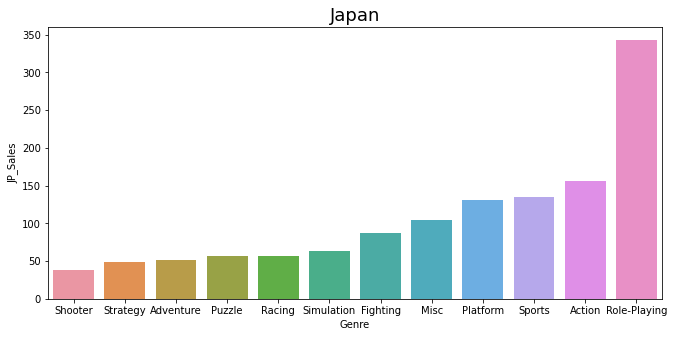

In [ ]:
# 일본지역
sns.barplot(x='Genre', y='JP_Sales', data=check1)
plt.title('Japan', fontsize=18)

Text(0.5, 1.0, 'Other country')

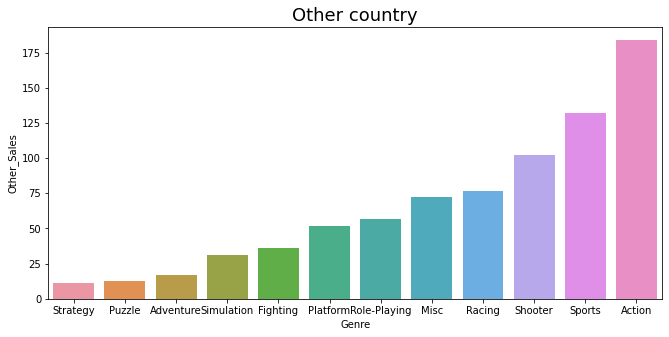

In [ ]:
# 기타지역
sns.barplot(x='Genre', y='Other_Sales', data=check1)
plt.title('Other country', fontsize=18)

In [68]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [69]:
check2 = df.loc[:, ['Year', 'Genre']]
check2.head()

,Year,Genre
1,2008.0,Action
2,2009.0,Action
3,2010.0,Adventure
4,2010.0,Misc
5,2010.0,Platform


In [70]:
# 연도별 게임 제작 장르 수
check2 = check2.groupby(['Year','Genre']).Genre.count()
check2

Year    Genre       
1980.0  Action           1
        Fighting         1
        Misc             4
        Shooter          2
1981.0  Action          25
                        ..
2016.0  Sports          38
        Strategy        10
2017.0  Action           1
        Role-Playing     2
2020.0  Simulation       1
Name: Genre, Length: 388, dtype: int64

In [71]:
# 그래프로 표현하기 쉽게하려면? tidy data
check2_df = pd.DataFrame(check2)
check2_df.rename({'Genre':'Count'}, axis=1, inplace=True)
check2_df.reset_index(inplace=True)
check2_df

,Year,Genre,Count
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1981.0,Action,25
...,...,...,...
383,2016.0,Sports,38
384,2016.0,Strategy,10
385,2017.0,Action,1
386,2017.0,Role-Playing,2


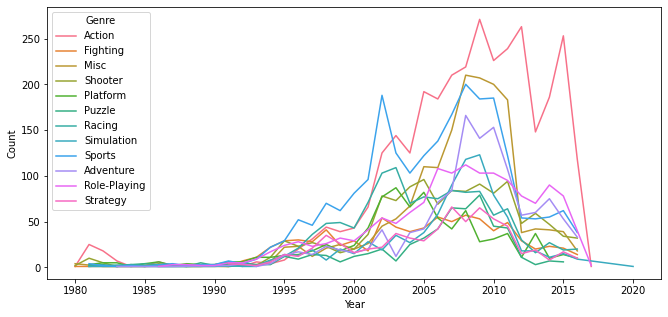

In [72]:
# 연도별 게임 제작 수(장르별) 
sns.lineplot(data=check2_df, x='Year', y='Count', hue='Genre')

In [73]:
years = check2_df['Year'].unique()

AxesSubplot(0.125,0.125;0.775x0.755)


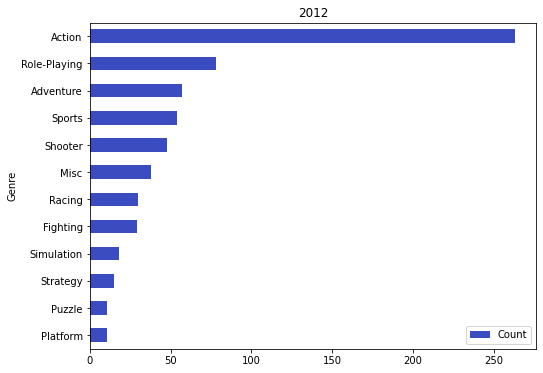

AxesSubplot(0.125,0.125;0.775x0.755)


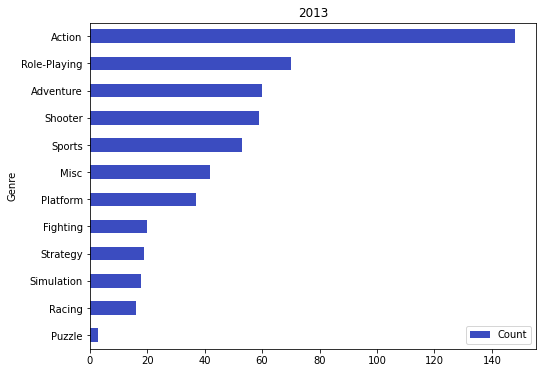

AxesSubplot(0.125,0.125;0.775x0.755)


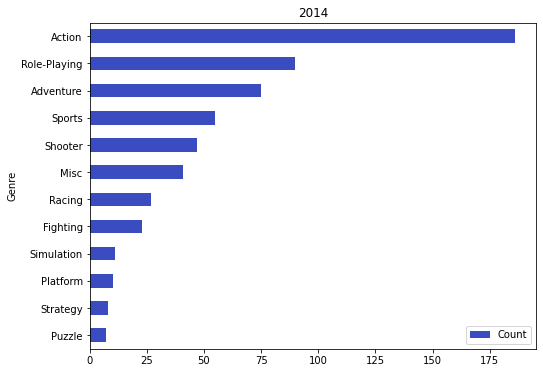

AxesSubplot(0.125,0.125;0.775x0.755)


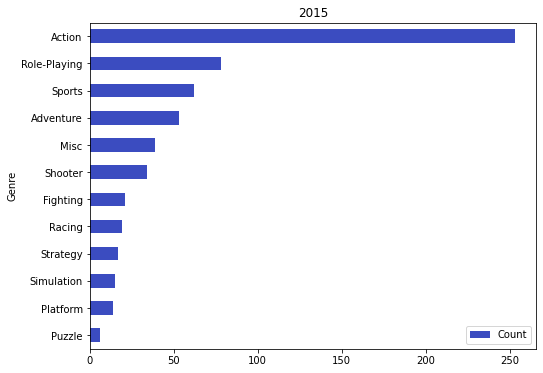

AxesSubplot(0.125,0.125;0.775x0.755)


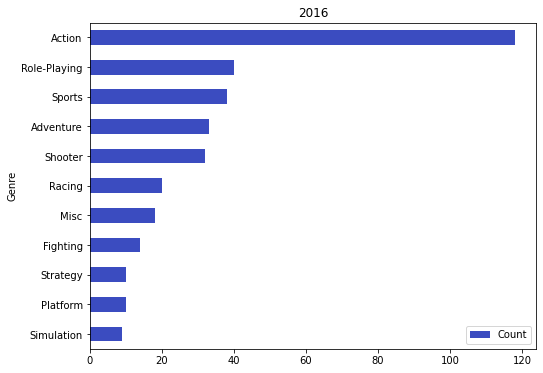

In [74]:
# 연도별 장르 경쟁사 수 확인2
check_years = years[-7:-2]
rcParams['figure.figsize'] = 8,6
for year in check_years:
  condition = (check2_df['Year'] == year)
  print(check2_df[condition].sort_values(by='Count').plot(kind='barh', x='Genre',
  y='Count',colormap='coolwarm', title='{}'.format(int(year))))
  plt.show()

In [75]:
# 장르별 연도 판매량 확인 = 장르의 연도별 판매 트렌드 파악
temp = df[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
check3 = temp.groupby(['Genre','Year']).agg({'NA_Sales':['sum'], 'EU_Sales':['sum'],'JP_Sales':['sum'], 'Other_Sales':['sum']})
check3

NA_Sales EU_Sales JP_Sales Other_Sales
                     sum      sum      sum         sum
Genre    Year                                         
Action   1980.0     0.32     0.02     0.00        0.00
         1981.0    13.86     0.81     0.00        0.12
         1982.0     6.07     0.38     0.00        0.05
         1983.0     2.67     0.17     0.00        0.02
         1984.0     0.80     0.19     0.83        0.03
...                  ...      ...      ...         ...
Strategy 2012.0     0.94     0.99     1.11        0.29
         2013.0     2.39     2.47     0.82        0.64
         2014.0     0.16     0.22     0.55        0.04
         2015.0     0.57     0.98     0.15        0.12
         2016.0     0.11     0.32     0.05        0.04

[388 rows x 4 columns]

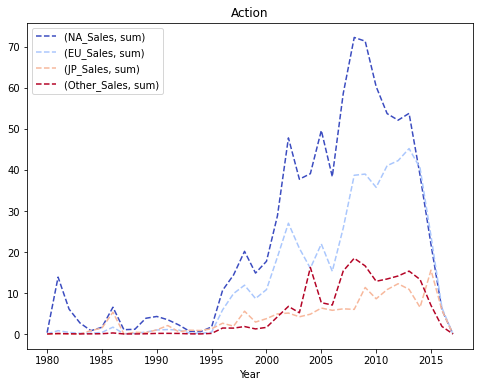

In [76]:
check3.loc['Action'].plot(linestyle='dashed', title='Action', colormap='coolwarm')
plt.legend()

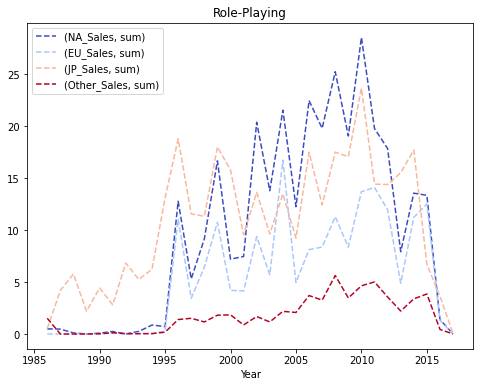

In [77]:
check3.loc['Role-Playing'].plot(linestyle='dashed', title='Role-Playing', colormap='coolwarm')
plt.legend()

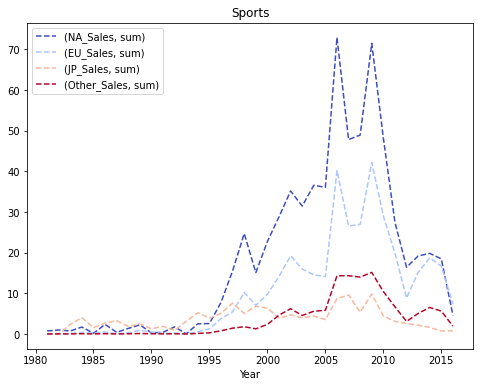

In [78]:
check3.loc['Sports'].plot(linestyle='dashed', title='Sports', colormap='coolwarm')
plt.legend()

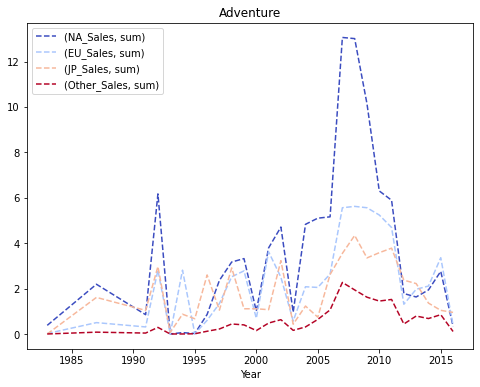

In [79]:
check3.loc['Adventure'].plot(linestyle='dashed', title='Adventure', colormap='coolwarm')
plt.legend()

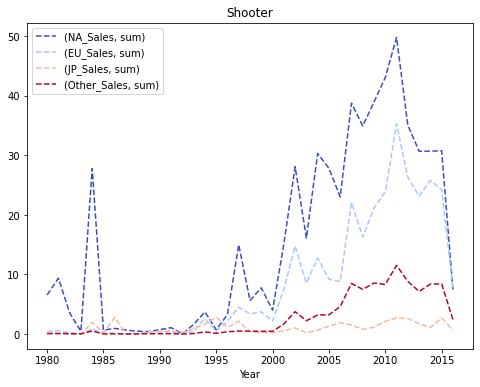

In [80]:
check3.loc['Shooter'].plot(linestyle='dashed', title='Shooter', colormap='coolwarm')
plt.legend()

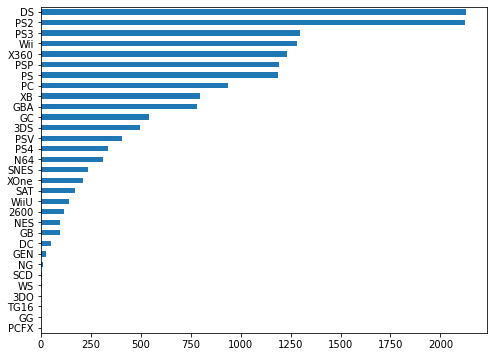

In [81]:
# 게임 플랫폼 시장순위 확인 
df['Platform'].value_counts().sort_values().plot(kind='barh')
# 1. 닌텐도 DS 2. PS 시리즈 3. Wii 4. X360 5.PSP

In [ ]:
# 2012~2016 제작수 1위 플랫폼확인
# 다음 결과를 바탕으로 PS 시리즈 플랫폼으로 선정한 게임장르 개발 진행
df.head(3)
platform = df.groupby(['Year','Platform']).agg({'NA_Sales':['count'], 'EU_Sales':['count'], 'JP_Sales':['count'],'Other_Sales':['count']})
platform.loc[2012.0].sort_values(by=('NA_Sales', 'count'), ascending=False).head(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,count,count,count,count
Platform,,,,
PS3,147,147,147,147


In [82]:
platform.loc[2013.0].sort_values(by=('NA_Sales', 'count'), ascending=False).head(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,count,count,count,count
Platform,,,,
PS3,127,127,127,127


In [83]:
platform.loc[2014.0].sort_values(by=('NA_Sales', 'count'), ascending=False).head(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,count,count,count,count
Platform,,,,
PS3,108,108,108,108


In [84]:
platform.loc[2015.0].sort_values(by=('NA_Sales', 'count'), ascending=False).head(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,count,count,count,count
Platform,,,,
PS4,136,136,136,136


In [85]:
platform.loc[2016.0].sort_values(by=('NA_Sales', 'count'), ascending=False).head(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
,count,count,count,count
Platform,,,,
PS4,107,107,107,107
